In [1]:
#Description: classifies images

#Import libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 

In [3]:
#Look at the data types of variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
#Get the shape of array
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [10]:
#take a look at the first image as array
index = 10
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

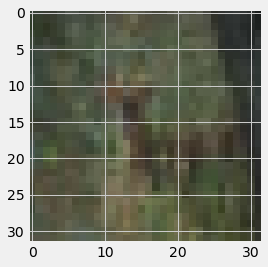

In [11]:
#Show img
img = plt.imshow(x_train[index])

In [12]:
#Get the image label
print('The image label is:', y_train[index])

The image label is: [4]


In [13]:
#Get the image classification
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#print the image class
print('The image class is:', classification[y_train[index][0]])

The image class is: deer


In [14]:
#Convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [15]:
#Print the new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [16]:
#print new label of the image above
print('The one hot label is:', y_train_one_hot[index])

The one hot label is: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [17]:
#normalize the pixels to be values between 0 and 1
x_train = x_train / 255
x_test = x_test /255

In [18]:
x_train[index]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [20]:
#Create the models architecture
model = Sequential()

#Add the first layer
model.add( Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))

#Add a pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#add the second layer
model.add (Conv2D(32, (5,5), activation='relu'))

#Add another pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#Add a flattening layer - reduce dimension to linear array
model.add(Flatten())

# Add a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

#Add a drop out layer
model.add(Dropout(0.5))

# Add a layer with 500 neurons
model.add(Dense(500, activation='relu'))

#Add a drop out layer
model.add(Dropout(0.5))

# Add a layer with 500 neurons
model.add(Dense(250, activation='relu'))

# Add a layer with 500 neurons
model.add(Dense(10, activation='softmax'))

In [21]:
#Compile the model
model.compile(loss= 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [22]:
#Train the model
hist = model.fit(x_train, y_train_one_hot,
                batch_size = 256,
                epochs = 10,
                validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 16s 102ms/step - loss: 1.7903 - accuracy: 0.3307 - val_loss: 1.5819 - val_accuracy: 0.4314
Epoch 2/10
157/157 [==============================] - 15s 95ms/step - loss: 1.4235 - accuracy: 0.4849 - val_loss: 1.5792 - val_accuracy: 0.4494
Epoch 3/10
157/157 [==============================] - 15s 96ms/step - loss: 1.2872 - accuracy: 0.5343 - val_loss: 1.1642 - val_accuracy: 0.5909
Epoch 4/10
157/157 [==============================] - 15s 96ms/step - loss: 1.1870 - accuracy: 0.5732 - val_loss: 1.1242 - val_accuracy: 0.6026
Epoch 5/10
157/157 [==============================] - 15s 95ms/step - loss: 1.0993 - accuracy: 0.6095 - val_loss: 1.0772 - val_accuracy: 0.6262
Epoch 6/10
157/157 [==============================] - 15s 95ms/step - loss: 1.0449 - accuracy: 0.6289 - val_loss: 1.0326 - val_accuracy: 0.6364
Epoch 7/10
157/157 [==============================] - 15s 95ms/step - loss: 0.9928 - accuracy: 0.6463 - val_loss: 1.0146 - val_accuracy

In [23]:
#Evaluate the model using test data set
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 2s 5ms/step - loss: 0.9524 - accuracy: 0.6693


0.6693000197410583

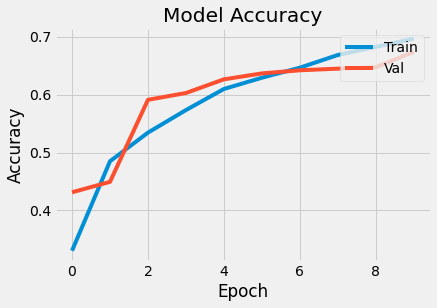

In [24]:
#Visualize the models accuracy 
plt.plot(hist.history ['accuracy'])
plt.plot(hist.history ['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

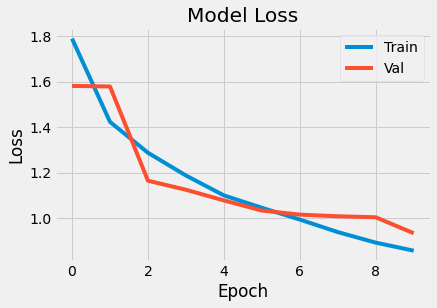

In [25]:
#Visualize model loss
plt.plot(hist.history ['loss'])
plt.plot(hist.history ['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [28]:
#Test the model 
from pandas import pd


ModuleNotFoundError: No module named 'google.colab'